# Quantum Detector Tomography

*Copyright (c) 2022 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.*

## Outline

A central challenge on the path towards large-scale quantum computing is the fidelity of the quantum measurement. A method that can accurately and reliably characterize unknown quantum measurement is desirable.
Quantum detector tomography (QDT) is a method that can be used to accurately describe the specific expression of quantum measurement.

This tutorial introduces Quantum Detector Tomography (QDT), covering its theory and implementation on [Baidu Quantum Platform](https://quantum.baidu.com/).

## Theory
The basic principle of quantum detector tomography is to measure a group of precisely known quantum states, and reconstruct the specific expression of the measurement operator from the measurement results.

### Detector tomography method
Quantum measurement can be described by a set of POVM $\left\{E_{m}\right\}_{m=1}^{M}$, where $M=d^2$, $d = 2^n$, $n$ represents the number of quantum bits. Select a set of quantum states $\left\{\rho_{n}\right\}_{n=1}^{N}$, where $N\geq d^2$, this set of quantum states is expanded into a Hilbert-Schmidt space. Then, we measure the quantum state and get $MN$ measurement results

$$
\begin{align}
\forall n \in \left[N\right], \;\forall m \in \left[M\right],\; p_{mn}:=\langle\langle E_m \vert \rho_n \rangle\rangle = \textrm{Tr}\left[E_m\rho_n\right].\label{PTM-1}
\end{align}
$$

$p_{mn}$ represents the probability that the measurement result of $\rho_n$ is $m$, which can be obtained experimentally.

Inserting the complete set of Pauli basis, we have

$$
\begin{align}
p_{mn}=\langle\langle E_m \vert \rho_n \rangle\rangle = \sum_{k=1}^{d^2}\langle\langle E_m\vert k\rangle\rangle\langle\langle k\vert \rho_n\rangle\rangle.\label{PTM-2}
\end{align}
$$

$p_{mn}$ can be obtained experimentally by the following methods: the frequency of statistical input state $\rho_n$ and output result $m$ is recorded as $f_{mn}$, then through the theorem of large numbers, we can have $p_{mn} = f_{mn}/F_{\rm shots}$. $f_{mn}$ meets the normalization condition

$$
\begin{align}
\forall n \in \left[N\right], \sum_{m=1}^M f_{mn} = F_{\rm shots}.
\end{align}
$$

Since $\left\{\rho_{n}\right\}_{n=1}^{N}$ is selected before the experiment, we can define a matrix $\mathfrak{P}$, whose expression is

$$
\begin{align}
  \mathfrak{P} = \begin{bmatrix}
    \langle\langle \rho_1 | 1 \rangle\rangle
    & \langle\langle \rho_1 |  2 \rangle\rangle & \cdots
    & \langle\langle \rho_1 | d^2 \rangle\rangle \\
    \langle\langle \rho_2 | 1 \rangle\rangle
    & \langle\langle \rho_2 | 2 \rangle\rangle & \cdots
    & \langle\langle \rho_2 | d^2 \rangle\rangle \\
    \vdots & \vdots & \ddots & \vdots \\
    \langle\langle \rho_N | 1 \rangle\rangle
    & \langle\langle \rho_N | 2 \rangle\rangle & \cdots
    & \langle\langle \rho_N | d^2 \rangle\rangle
  \end{bmatrix}.
\end{align}
$$

Similarly, we can also define an unknown POVM as a matrix $\mathfrak{M}$, whose expression is

$$
\begin{align}
  \mathfrak{M} = \begin{bmatrix}
    \langle\langle E_1 | 1 \rangle\rangle
    & \langle\langle E_1 |  2 \rangle\rangle & \cdots
    & \langle\langle E_1 | d^2 \rangle\rangle \\
    \langle\langle E_2 | 1 \rangle\rangle
    & \langle\langle E_2 | 2 \rangle\rangle & \cdots
    & \langle\langle E_2 | d^2 \rangle\rangle \\
    \vdots & \vdots & \ddots & \vdots \\
    \langle\langle E_M | 1 \rangle\rangle
    & \langle\langle E_M | 2 \rangle\rangle & \cdots
    & \langle\langle E_M | d^2 \rangle\rangle
  \end{bmatrix}.
\end{align}
$$

All QDT has to do is find out every element of $\mathfrak{M}$.

The probabilities obtained from our experiments can also be written in the form of matrices

$$
\begin{align}
  P = \begin{bmatrix}
    p_{11}
    & p_{12} & \cdots
    & p_{1N} \\
    p_{21}
    & p_{22} & \cdots
    & p_{2N} \\
    \vdots & \vdots & \ddots & \vdots \\
    p_{M1}
    & p_{M2} & \cdots
    & p_{MN}
  \end{bmatrix}.
\end{align}
$$

The probabilities obtained from our experiments can also be written in the form of matrices

$$
\begin{align}
P = \mathfrak{M}\mathfrak{P}^\mathrm{T}.
\end{align}
$$

This is a linear regression model. Given $P$ and $\mathfrak{P}$, solve $\mathfrak{M}$. There are many ways we can deal with it.

#### Linear inversion estimation

If the set of quantum states $\left\{\rho_n\right\}_n$ are carefully chosen
so that $\mathfrak{P}$ is invertible (in which case it must hold that $N=d^2$), the solution is intuitive

$$
\begin{align}
\mathfrak{M} = P\left(\mathfrak{P}^\mathrm{T}\right)^{-1}.
\end{align}
$$

#### Ordinary least squares

However, this linear inversion estimation cannot deal with the overcomplete sets of quantum states where $N > d^2$, which can theoretically improve the estimation accuracy. In this case, $\mathfrak{P}$ has more rows than columns and cannot be inverted. In this case, we can use the
the ordinary least-squares estimate as

$$
\begin{align}
\mathfrak{M}^\ast := \operatorname*{argmin}_{\mathfrak{M}} \left\|{P-\mathfrak{M}\mathfrak{P}^\mathrm{T}}\right\|_2^2.
\end{align}
$$

where $\left\|\cdot\right\|_2$ is the Euclidean norm. Actually, the optimization problem can be analytically resolved provided that the columns of the matrices $\mathfrak{P}$ and $P$ are linearly independent:

$$
\begin{align}
&\quad    \mathfrak{M}\mathfrak{P}^T = P \\
\Rightarrow&\quad \mathfrak{M}\left(\mathfrak{P}^T\mathfrak{P}^*\right) = P\mathfrak{P}^* \\
\Rightarrow&\quad \mathfrak{M} = P\mathfrak{P}^* \left(\mathfrak{P}^T\mathfrak{P}^*\right)^{-1}.
\end{align}
$$

where $\mathfrak{P}^\ast$ is the complex conjugate of $\mathfrak{P}$ and $\mathfrak{P}\mathfrak{P}^\dagger$ is known as the Gram matrix and is always invertible.


#### Maximal likelihood estimation

There is a severe problem with the previous two methods---linear inversion estimation
and ordinary least squares---it is very possible that detector tomography will return an illegal POVM. In this section we summarize the maximum likelihood estimation (MLE) analysis for quantum detector tomography

The log likelihood function is defined as

$$
\begin{align}
    \log\mathcal{L} := \sum_m\sum_n f_{mn}\log\textrm{Tr}\left[E_m\rho_n\right].
\end{align}
$$

The sum over index $n$ contains an informationally complete set of detective states.
The normalization constraint $\sum_m E_m=I$ is implemented by Lagrange multipliers.
In this MLE problem, $\left\{E_m\right\}$ is the parameters to be estimated.
Each event $\left(m,n\right)$ ---input state $\rho_n$ and observe the outcome $m$ ---corresponds
to an individual likelihood function, which is given by

$$
\begin{align}
    \mathcal{L}\left(\left\{E_m\right\}\vert \left(m,n\right)\right) = P\left(\left(m,n\right)\vert\left\{E_m\right\}\right) = \textrm{Tr}\left[E_m\rho_n\right].
\end{align}
$$

We have a total number $F_{\rm shots}\times N$ of events $\left\{\left(m_k,n_k\right)\right\}_{k=1}^{F_{\rm shots}\times N}$. Correspondingly, the global likelihood function for the observed dataset $\left\{\left(m_k,n_k\right)\right\}$ is defined as

$$
\begin{align}
  \mathcal{L}\left(\left\{E_m\right\}\vert\left\{\left(m_k,n_k\right)\right\}\right)
= \prod_{\left(m_k,n_k\right)}\mathcal{L}\left(\{E_m\}\vert \left(m_k,n_k\right)\right)
= \prod_{m,n}\textrm{Tr}\left[E_m\rho_n\right]^{f_{mn}}.
\end{align}
$$

maximization with the constraint leads to the equation

$$
\begin{align}\tag{1}\label{qdt}
    E_m = R_n E_m R_n^\dagger,
\end{align}
$$

where

$$
\begin{align}\tag{2}\label{qdt-2}
  R_m
= \left(\sum_{m'}\sum_{n,n'}\frac{f_{m'n}f_{m'n'}}{\hat{p}_{m'n}\hat{p}_{m'n'}}\rho_nE_{m'}\rho_{n'}\right)^{-\frac{1}{2}}
	\left(\sum_n\frac{f_{mn}}{\hat{p}_{mn}}\rho_n\right),
\end{align}
$$

where $\hat{p}_{mn} = \textrm{Tr}\left[E_m\rho_n\right]$ is the **theoretical** probability of measuring the state $\rho_n$ and obtaining outcome $m$.

Eq.\eqref{qdt} yields an iterative process to estimate the optimal POVM. Each iteration starts with updating $E_m$ according to Eq.\eqref{qdt}, and ends with calculating $R_m$ from Eq~\eqref{qdt-2} for the next iteration. The termination condition is set as

$$
\begin{align}
    \max_{m} \left\|{E_m^{\left(k\right)} - E_m^{\left(k+1\right)}}\right\|_2 \leq \varepsilon,
\end{align}
$$

where the subscript denotes the $k$-th and the $\left(k+1\right)$-th iterations,
the norm is taken to be the Euclidean norm.
Positivity and normalization are preserved as long as the initial values of
$\left\{E^{\left(0\right)}_m\right\}$ form a POVM. A common choice is $\left\{E_{m}^{\left(0\right)}\right\} = \frac{I}{d}$, the maximally mixed operator.
It is worth mentioning that $\varepsilon$ should be small enough so that the numerical error introduced by the cutoff is less than the uncertainty of the estimated parameters caused by statistical fluctuations.

Finally, the flow chart is as follows.
 
![QST](./figures/qdt-chart.png "Figure 1: Flow chart of QDT")

## Practice

We demonstrate quantum detector tomography on the measurement device.

First, we import the necessary libraries.

In [1]:
from qcompute_qep.tomography.detector_tomography import DetectorTomography, visualization
from QCompute import *

Detector tomography is a method to accurately describe measurement equipment, so we first need to create a quantum circuit containing measurement, taking a two bit quantum system as an example,

In [2]:
n = 2
qp = QEnv()
qp.Q.createList(n)

Then we set the quantum computer (instance of QComputer). The QuantumComputer can be a simulator or a hardware interface. The rest is simple, we initialize a DetectorTomography instance, call the tomography procedure and obtain the calculated POVM, we set the method as 'inverse' means that we choose the Linear inversion estimation method mentioned above. In addition to the inversion method, the Least square method and Maximum likelihood estimation method mentioned above are also implemented in our Detectortomography module.

In [3]:
# Please login the "Quantum Leaf" platform (https://quantum-hub.baidu.com/) to get Token
Define.hubToken = "Token"

qc = BackendName.CloudBaiduQPUQian
# Initialize a DetectorTomography instance
detec = DetectorTomography()

# Call the tomography procedure and obtain the POVM.
# Other supported methods are 'lstsq', 'mle'.
meas = detec.fit(qp=qp, qc=qc, method='inverse', shots=8192)
print('POVM', meas)

Step 1/3 : Constructing quantum circuits...: 100%|█| 100.0/100 [00:00<00:00, 264
Step 2/3 : Collecting experiment results...: 100%|█| 100.0/100 [00:00<00:00, 319


Step 3/3 : Working on INVERSE method...
POVM [array([[ 1.00000000e+00+0.00000000e+00j, -2.56347656e-03+7.81250000e-03j,
        -6.22558594e-03+9.39941406e-03j, -1.83105469e-04-1.52587891e-03j],
       [-2.56347656e-03-7.81250000e-03j, -5.55111512e-17+0.00000000e+00j,
         5.06591797e-03-1.64794922e-03j, -4.96130914e-16+4.44089210e-16j],
       [-6.22558594e-03-9.39941406e-03j,  5.06591797e-03+1.64794922e-03j,
        -4.44089210e-16+0.00000000e+00j, -2.97721917e-16+2.14238349e-16j],
       [-1.83105469e-04+1.52587891e-03j, -4.96130914e-16-4.44089210e-16j,
        -2.97721917e-16-2.14238349e-16j,  1.66533454e-16+0.00000000e+00j]]), array([[-5.82867088e-16+0.00000000e+00j,  2.56347656e-03-7.81250000e-03j,
        -8.30498864e-17+1.06685494e-16j, -2.44140625e-03+7.81250000e-03j],
       [ 2.56347656e-03+7.81250000e-03j,  1.00000000e+00+0.00000000e+00j,
        -1.22070313e-02+5.73730469e-03j,  3.05175781e-03-1.53808594e-02j],
       [-8.30498864e-17-1.06685494e-16j, -1.22070313e-02-5

It is worth mentioning that our module can easily tomograph the measurement operators of the specified qubits, just add the **qubits** variable, and the calling method is as follows

In [ ]:
# meas = detec.fit(qp=qp, qc=qc, method='inverse', shots=8192, qubits=[1])

Next, we calculate the measurement fidelity, which is defined as

$$
\begin{align}
    f\left(\mathcal{M}\right) := \frac{1}{2^n}\sum_{\mathbf{x}\in\left\{0,1\right\}^n}\langle \mathbf{x}\vert\Pi_{\mathbf{x}}\vert\mathbf{x}\rangle.
\end{align}
$$

It should be pointed out that the measurement fidelity with respect to the ideal standard measurement basis.

In [4]:
fid = detec.fidelity
print('Fidelity of the POVM: F = {:.5f}'.format(fid))

Fidelity of the POVM: F = 1.00000


The tomography results can also be visualized. Here, the POVM $E_{00}$ for visualization

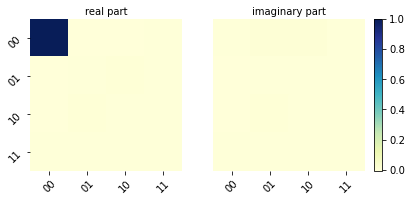

In [5]:
visualization(meas[0])

## Summary

This tutorial describes how to use Quantum Detector Tomography method to reconstruct the unknown quantum state on [Baidu Quantum Platform](https://quantum.baidu.com/).

## 参考资料
[1] Greenbaum, Daniel. "Introduction to quantum gate set tomography." [arXiv](https://arxiv.org/abs/1509.02921) preprint arXiv:1509.02921 (2015).

[2] Fiurášek, Jaromír. "Maximum-likelihood estimation of quantum measurement." [Physical Review A](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.64.024102) 64.2 (2001): 024102.

[3] Chen, SY Yanzhu, Maziar Farahzad, and T. C. Wei. "Detector tomography on ibm 5-qubit quantum computers and mitigation of imperfect measurement, arXiv (2019)." [arXiv](https://arxiv.org/abs/1904.11935) preprint arXiv:1904.11935.